<a href="https://colab.research.google.com/github/spencergoldberg1/Data-Science/blob/develop/Flower_Detection_Alexnet_Spencer_Goldberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from google.colab import drive
from torchsummary import summary

In [254]:
# 1. Mount Google Drive
drive.mount('/content/gdrive')

# 2. Load labeled images from folders
# data_dir = '/content/gdrive/MyDrive/Data1/antsbeesdataset'
data_dir = '/content/gdrive/MyDrive/DataSci/FlowerDetection'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [255]:
cd /content/gdrive/MyDrive/DataSci/FlowerDetection

/content/gdrive/MyDrive/DataSci/FlowerDetection


In [256]:
ls

train/  valid/


In [257]:
# 3. Pre-process the data and create data loaders
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [258]:
image_datasets = {x: datasets.ImageFolder(data_dir + '/' + x, data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [259]:
# 4. Set up the AlexNet architecture
alexnet = models.alexnet(pretrained=True)

In [260]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [261]:

num_ftrs = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_ftrs, len(class_names)) # Change last layer
alexnet = alexnet.to(device) # Put on GPU

In [262]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [263]:
summary(alexnet, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [264]:
class_names

['daisy', 'rose', 'sunflower', 'tulip']

In [265]:
dataset_sizes

{'train': 320, 'valid': 100}

In [266]:
for inputs, labels in dataloaders["train"]:
        inputs = inputs.to(device)
        labels = labels.to(device)

In [267]:
inputs.shape

torch.Size([16, 3, 224, 224])

In [268]:
labels.shape

torch.Size([16])

In [269]:
labels

tensor([1, 2, 1, 0, 0, 1, 1, 1, 2, 3, 3, 2, 2, 3, 2, 2], device='cuda:0')

In [270]:
outputs = alexnet(inputs)

In [271]:
outputs.shape

torch.Size([16, 4])

In [272]:
outputs

tensor([[ 0.7978, -0.2299, -0.1069, -0.4921],
        [ 0.9439,  0.1342, -0.9148,  0.1385],
        [ 0.7626,  1.7574, -0.7638,  0.6884],
        [ 0.0310,  0.1151,  1.3151, -0.4420],
        [ 0.1026, -1.7257,  1.1132,  1.0879],
        [ 0.7767,  0.2485, -0.0515,  0.0281],
        [ 0.1491, -0.6063,  0.0393,  0.8034],
        [ 0.9564, -0.0155,  0.1886,  0.1390],
        [-0.0471,  0.2988, -0.2817,  0.4705],
        [ 0.4904,  0.2422,  0.5529,  0.2147],
        [ 1.1218, -0.6366,  0.2015, -0.0178],
        [ 0.7383, -0.3327,  0.3029,  0.3304],
        [ 1.0706,  1.1661, -0.3352, -1.0223],
        [ 1.7908,  1.2398, -0.5837, -0.3679],
        [ 1.0258,  0.0302,  1.1695,  0.1019],
        [-0.2352, -0.0143, -1.0678, -0.1019]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [273]:
torch.max(outputs,1)[0]

tensor([ 0.7978,  0.9439,  1.7574,  1.3151,  1.1132,  0.7767,  0.8034,  0.9564,
         0.4705,  0.5529,  1.1218,  0.7383,  1.1661,  1.7908,  1.1695, -0.0143],
       device='cuda:0', grad_fn=<MaxBackward0>)

In [274]:
torch.max(outputs,1)[1]

tensor([0, 0, 1, 2, 2, 0, 3, 0, 3, 2, 0, 0, 1, 0, 2, 1], device='cuda:0')

In [275]:
preds = torch.max(outputs, 1)[1]

In [276]:
preds

tensor([0, 0, 1, 2, 2, 0, 3, 0, 3, 2, 0, 0, 1, 0, 2, 1], device='cuda:0')

In [277]:
labels

tensor([1, 2, 1, 0, 0, 1, 1, 1, 2, 3, 3, 2, 2, 3, 2, 2], device='cuda:0')

In [278]:
preds == labels

tensor([False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False,  True, False], device='cuda:0')

In [279]:
labels.shape[0]

16

In [280]:
torch.sum(preds == labels)/labels.shape[0]

tensor(0.1250, device='cuda:0')

In [281]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

# Train the AlexNet model
alexnet.train()

num_epochs = 20

for epoch in range(num_epochs):
    print(epoch, " of ", num_epochs - 1)
    print('-' * 10)

    running_corrects = 0

    for inputs, labels in dataloaders["train"]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        

        outputs = alexnet(inputs)
        preds = torch.max(outputs, 1)[1]



        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_corrects += torch.sum(preds == labels.data)

    print('Train Acc: {:.4f}'.format(running_corrects / dataset_sizes["train"]))




    # Evaluate the AlexNet model on Validation Data
    alexnet.eval()

    running_corrects = 0

    for inputs, labels in dataloaders["valid"]:
        inputs = inputs.to(device)
        labels = labels.to(device)


        outputs = alexnet(inputs)
        preds = torch.max(outputs, 1)[1]


        running_corrects += torch.sum(preds == labels.data)

    acc_valid = running_corrects / dataset_sizes["valid"]
    print('Valid Acc: {:.4f}'.format(acc_valid))
    if acc_valid > 0.99:
        print("Done!")
        break


print('Training complete')

0  of  19
----------
Train Acc: 0.6656
Valid Acc: 0.8000
1  of  19
----------
Train Acc: 0.9062
Valid Acc: 0.8200
2  of  19
----------
Train Acc: 0.9156
Valid Acc: 0.8800
3  of  19
----------
Train Acc: 0.9250
Valid Acc: 0.8100
4  of  19
----------
Train Acc: 0.9156
Valid Acc: 0.8200
5  of  19
----------
Train Acc: 0.9250
Valid Acc: 0.8600
6  of  19
----------
Train Acc: 0.9500
Valid Acc: 0.8500
7  of  19
----------
Train Acc: 0.9625
Valid Acc: 0.8400
8  of  19
----------
Train Acc: 0.9688
Valid Acc: 0.8600
9  of  19
----------
Train Acc: 0.9594
Valid Acc: 0.8600
10  of  19
----------
Train Acc: 0.9781
Valid Acc: 0.8500
11  of  19
----------
Train Acc: 0.9719
Valid Acc: 0.8300
12  of  19
----------
Train Acc: 0.9688
Valid Acc: 0.8300
13  of  19
----------
Train Acc: 0.9656
Valid Acc: 0.8500
14  of  19
----------
Train Acc: 0.9938
Valid Acc: 0.8500
15  of  19
----------
Train Acc: 0.9781
Valid Acc: 0.8200
16  of  19
----------
Train Acc: 0.9938
Valid Acc: 0.8400
17  of  19
----------
Tr

In [282]:
pwd

'/content/gdrive/MyDrive/DataSci/FlowerDetection'

In [283]:
model_path = '/content/gdrive/MyDrive/DataSci/FlowerDetection/alexnet_classification_flowers.pth'

In [284]:
# Save the trained model
torch.save(alexnet.state_dict(), model_path)

In [285]:
ls

alexnet_classification_flowers.pth  train/  valid/


In [286]:
import requests
from PIL import Image
from io import BytesIO
import imageio as io
import matplotlib.pyplot as plt
# 1. Load the trained AlexNet model
def load_model(model_path):
    model = models.alexnet()
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, len(class_names))
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model.to(device)

# 2. Define a function to load an image from a URL and preprocess it
def preprocess_image(url, transform):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img_tensor = transform(img)
    return img_tensor.unsqueeze(0).to(device)

# 3. Perform inference using the loaded model
def predict_image_url(url, model):
    img_tensor = preprocess_image(url, data_transforms['valid'])
    output = model(img_tensor)
    pred = torch.max(output, 1)[1]
    return class_names[pred]

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(3, 5)
    plt.show()

In [287]:
trained_model = load_model(model_path)

In [290]:
urls = ['https://hips.hearstapps.com/hmg-prod/images/daisy-flower-1532449822.jpg?crop=0.7498666666666667xw:1xh;center,top&resize=1200:*',
        'https://cdn11.bigcommerce.com/s-1b9100svju/product_images/uploaded_images/mixed-tulips.jpg',
        'http://cdn.shopify.com/s/files/1/0620/2749/7724/products/tulip-red-impression-1_e47d4589-0657-49cf-9ea8-a1d923c76fd9.jpg?v=1653663176',
        'https://media.istockphoto.com/id/1277541723/photo/lady-ryder-of-warsaw-rich-crimson-red-roses-modern-british-shrub-by-harkness.jpg?s=612x612&w=0&k=20&c=e0WhAAcQ9lkO_0MCxXbBd914fPuacDDWz7wwvDMhA6M=',
        'https://s3g2u3k4.rocketcdn.me/wp-content/uploads/sites/4/2022/11/sunflower.jpg'
        ]

<ipython-input-291-40e23e8c936b>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread(image_url)


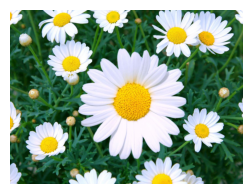

The predicted class for the input image is: daisy


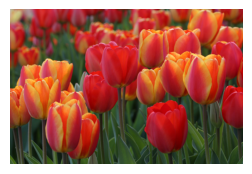

The predicted class for the input image is: tulip


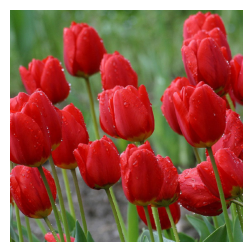

The predicted class for the input image is: tulip


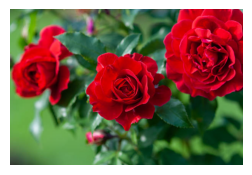

The predicted class for the input image is: rose


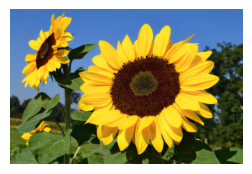

The predicted class for the input image is: sunflower


In [291]:
for image_url in urls:
  image = io.imread(image_url)
  plot(image)
  prediction = predict_image_url(image_url, trained_model)
  print("The predicted class for the input image is:", prediction)